https://swharden.com/blog/2020-09-23-signal-filtering-in-python/

In [14]:
!pip install pyvital vitaldb vital

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from matplotlib import pyplot as plt
import matplotlib
import pandas
import numpy as np
from scipy.fftpack import fft

In [16]:


import vitaldb
srate = 100
vals = vitaldb.load_case(10, ['SNUADC/ECG_II','SNUADC/ART'], 1 / srate)
signal = vals[:,0][np.logical_not(np.isnan(vals[:,0]))]
import matplotlib.pyplot as plt
ecg = signal[110000:111000]#vals[110000:111000, 0]
art = vals[110000:111000, 1]

In [17]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# read ECG data from the WAV file
sampleRate, data = 100,ecg
times = np.arange(len(data))/sampleRate

# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.1)
filtered = scipy.signal.filtfilt(b, a, data)

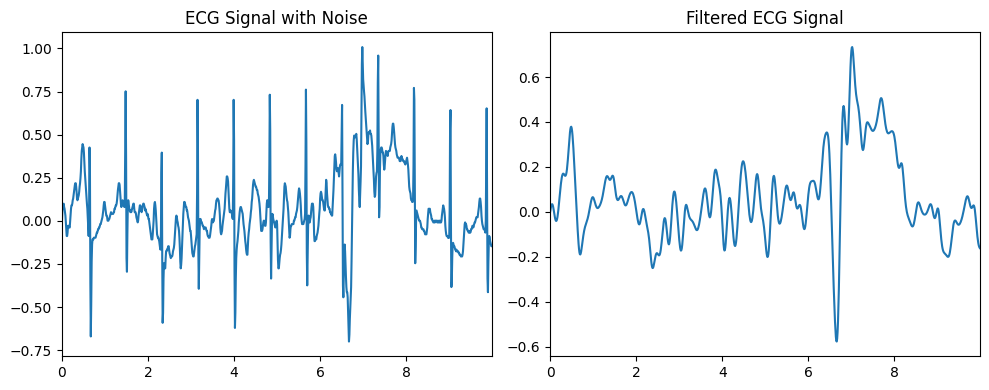

In [18]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, data)
plt.title("ECG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered ECG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

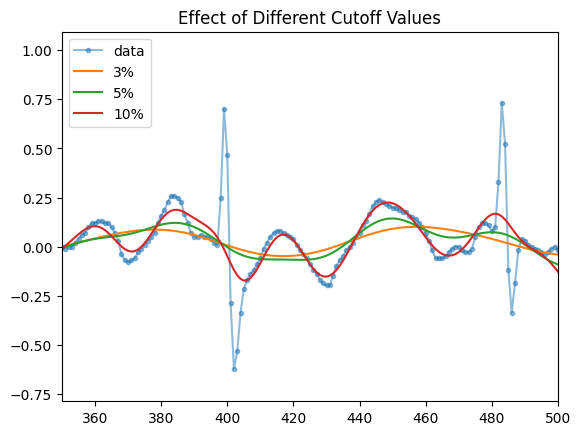

In [19]:
plt.plot(data, '.-', alpha=.5, label="data")

for cutoff in [.03, .05, .1]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*100):d}%"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([350, 500, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

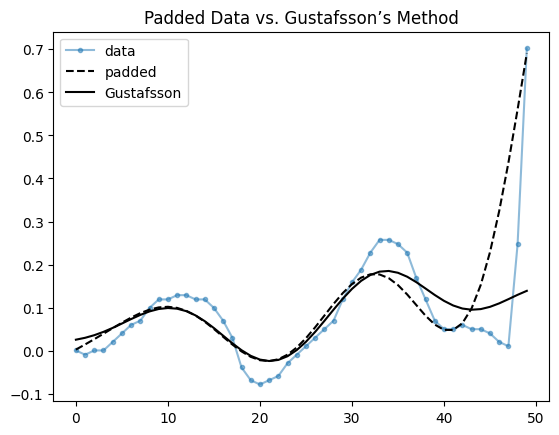

In [20]:
# A small portion of data will be inspected for demonstration
segment = data[350:400]

filtered = scipy.signal.filtfilt(b, a, segment)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, '.-', alpha=.5, label="data")
plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.show()

In [21]:
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)

In [22]:
# create a normalized Hanning window
windowSize = 40
window = np.hanning(windowSize)
window = window / window.sum()

# filter the data using convolution
filtered = np.convolve(window, data, mode='valid')